# Final Project: An Introduction to Pandas by Analyzing Mortality Data across the U.S

The purpose of this project is to be able to help you draw quick summaries and visualizations of fatality data within the U.S, while also getting a brief introduction to the highly efficient data processor, Pandas. The ability to work with big data is a powerful thing; however, it does not come without it's challenges and indexing even the smallest bit of data can be a challenge. But no fear, we can learn it together!

The code here is run on the csv file “Leading Causes of Death in the United States," provided by the Center for Disease Control. Using Pandas, we should be able to sort through and wrangle the mass collection of mortality data from the years 1999 to 2016 and call on states' leading causes of death at a particular time. In addition, we should be able to extract overall population mortality rates and which causes of death affect the most people.


In [1]:
#external modules to help with data analysis and visualizations
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
#primary dataset we will be focusing on
lcd_data = pd.read_csv("NCHS_-_Leading_Causes_of_Death__United_States.csv")

# Part 1: Getting to Know our Dataset

1) In order for us to get a better idea of what our data looks like on a smaller scale, we will call the first 5 rows using lcd_data.head

2) After this we will be able to clearly see the listed columns and maybe even figure out which ones we don't want to look at. For example, for our purposes, 113 Cause Name is repetitive and we will not be needing it. Therefore, we will delete that column using 
data.drop()

3) We can also rename some of our column labels in order to make them more accessible in the future using data.rename()

4) We can show if we have any missing values and what types of data we have using data.info()

5) We can get quick descriptions of our numerical values' statistics using data.describe()

If we want to describe a specific column, we can simply call the describe method on that column name. For example, to get the stats of Deaths from the datat set: final_data.Deaths.describe()

6) We can check which columns we have in the dataset using  
data.columns

7) Most interestingly, we can also locate specific rows and columns using 
data.loc[[],['']]

For example, if we wanted to identify the first row's year, state, Cause, and Deaths, we would write: 

final_data.loc[ [1] , ['Year', 'State', 'Cause', 'Deaths']]

Play around with these functions and see how the data presented changes for you 

In [3]:
#1 Peeking at our Data
lcd_data.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2755,55.5
1,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,439,63.1
2,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4010,54.2
3,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1604,51.8
4,2016,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,California,13213,32.0


In [4]:
#2: Dropping columns
data = lcd_data.drop(columns=['113 Cause Name'])

In [5]:
#3: Renaming columns
final_data=data.rename(index=int, columns={"Cause Name": "Cause", "Age-adjusted Death Rate": "AADR"})

In [6]:
#Some tests to make sure the changes we made to 'data' were implemented into 'final_data'
assert len(final_data.columns.values)==5
assert (final_data.columns.values == (['Year', 'Cause', 'State', 'Deaths', 'AADR'])).all
assert final_data.size==51480

In [7]:
##4 Checking if anything is missing and types of data
final_data.info()
#note, we have a total of 5 columns by 10296 rows (WOW) and no missing values (YAY)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10296 entries, 0 to 10295
Data columns (total 5 columns):
Year      10296 non-null int64
Cause     10296 non-null object
State     10296 non-null object
Deaths    10296 non-null int64
AADR      10296 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 482.6+ KB


In [8]:
#5 Stats
final_data.describe()

,Year,Deaths,AADR
count,10296.000000,1.029600e+04,10296.000000
mean,2007.500000,1.532668e+04,128.026428
std,5.188379,1.112160e+05,224.355281
min,1999.000000,2.100000e+01,2.600000
25%,2003.000000,6.060000e+02,19.200000
50%,2007.500000,1.704500e+03,35.800000
75%,2012.000000,5.678000e+03,153.025000
max,2016.000000,2.712630e+06,1087.300000


In [9]:
#5a Column specific Stats
final_data.Deaths.describe()

count    1.029600e+04
mean     1.532668e+04
std      1.112160e+05
min      2.100000e+01
25%      6.060000e+02
50%      1.704500e+03
75%      5.678000e+03
max      2.712630e+06
Name: Deaths, dtype: float64

In [10]:
#6: Columns
final_data.columns

Index(['Year', 'Cause', 'State', 'Deaths', 'AADR'], dtype='object')

In [11]:
#7: Indexing tells us more data about our data 
final_data.index 

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            10286, 10287, 10288, 10289, 10290, 10291, 10292, 10293, 10294,
            10295],
           dtype='int64', length=10296)

In [12]:
#7a: Identifying specific rows we want to see from our data set, using integers
final_data.loc[[5,10,15]]

,Year,Cause,State,Deaths,AADR
5,2016,Unintentional injuries,Colorado,2880,51.2
10,2016,Unintentional injuries,Georgia,4701,45.8
15,2016,Unintentional injuries,Iowa,1608,45.8


In [13]:
#7b: Selecting rows and columns at the same time 
data.loc[[1, 103, 278, 892, 10000] , ['Year', 'State', 'Cause Name', 'Deaths']]

,Year,State,Cause Name,Deaths
1,2016,Alaska,Unintentional injuries,439
103,2000,Arizona,All causes,40500
278,2005,Idaho,All causes,10556
892,2003,Vermont,All causes,5120
10000,2004,North Dakota,Unintentional injuries,274


# Part 2: Organizing and Indexing our Data

Wow! So, we just learned some of the basic affordances Pandas allows you when working with big data sets. We even got to see how we can narrow down some of the data presented by indexing specific rows and columns. While this is interesting, however, calling on random rows to give us the specific attribute information (columns), is not a systematic or efficient way to analyze your data. Therefore, we need to start thinking about how we can sort information, so that we can answer specific questions when calling on an indexed piece of information. 

For example, how can I see what the leading causes of death were in 2010 in California? 

In this dataset, information is organized by Year, State, and Cause Name (cause of death), meaning that in order to call on a piece of information, say the number of deaths from the year 2016, then you will need to specify the Cause Name (in this case, All Causes), and the State (in this case, All states). In Pandas, you can index things similar to the way you would in a dictionary. For example, I can call final_data['Year'] and it will give me all the years listed in the dataset.

Let's try indexing our values to easily call on a data point that includes the number of deaths from a specific Year, in a specific State, from a specific Cause 

In [14]:
#demo with state specific data using California as an example

#this gives me all california mortality data
cali_data = final_data[final_data['State'] == 'California']
    
#this gives me general death rate over all years
cali_allyears=cali_data[cali_data['Cause']=='All causes']
    
#this gives me all california mortality data from 2010
cali_2010 = cali_data[cali_data['Year'] == 2010]

#this gives me the number of deaths in CA in 2010
cali_all_2010 = cali_2010[cali_2010['Cause'] == 'All causes']


In [15]:
#Demo of CA continued 
#We can play with sorting what we've indexed so far
#This sort function gives the ranks the Cause by number of deaths associated with that cause of death in 2010
cali_2010_sorted = cali_2010.sort_values(['Deaths', 'Cause'], ascending=False)
cali_2010_sorted[['Deaths', 'Cause']].head(11)

,Deaths,Cause
129,234012,All causes
4809,58641,Heart disease
2001,56453,Cancer
7617,13662,Stroke
2937,12987,CLRD
1065,10856,Alzheimer's disease
9484,10435,Unintentional injuries
3873,7061,Diabetes
5745,5882,Influenza and pneumonia
8553,3913,Suicide


In [16]:
assert (cali_all_2010.columns.values == ([2010, 'All causes', 'California', 234012, 646.7])).all

In [58]:
def state_one_year(state, year):
    
    """this function calls on a Cause for any state and year"""

    state_data = final_data[final_data['State'] == state]    
    state_year = state_data[state_data['Year'] == year]
    list_of_causes_in_year = state_year['Cause']    
    return (state_year, list_of_causes_in_year)

def state_all_years(state):
    
    """this function returns the single death rate of a state from all causes over all years"""
    
    state_data = final_data[final_data['State'] == state]    
    state_all_years = state_data[state_data['Cause'] == 'All causes']    
    return (state_all_years)

def sort_state(state_year):
    
    """this function sorts the causes of death by death rates in the given year """
    
    state_year_sorted = state_year.sort_values(['Deaths', 'Cause'], ascending=False)
    return state_year_sorted[['Deaths', 'Cause']].head(11)

In [59]:
#We can check that this function has done what we want it to by passing through California and 2010, which should match our output from our demo
#(c,y) states our inputs as a tuple 
#(x=state_year of California) and (y=list of causes of death in that year)
(c,y)=state_one_year('California', 2010)
print(y)
sort_state(c)


129                  All causes
1065        Alzheimer's disease
2001                     Cancer
2937                       CLRD
3873                   Diabetes
4809              Heart disease
5745    Influenza and pneumonia
6681             Kidney disease
7617                     Stroke
8553                    Suicide
9484     Unintentional injuries
Name: Cause, dtype: object


,Deaths,Cause
129,234012,All causes
4809,58641,Heart disease
2001,56453,Cancer
7617,13662,Stroke
2937,12987,CLRD
1065,10856,Alzheimer's disease
9484,10435,Unintentional injuries
3873,7061,Diabetes
5745,5882,Influenza and pneumonia
8553,3913,Suicide


In [60]:
#let's see another example with Alabama's mortality rankings in 2016 

(a, z)= state_one_year('Alabama', 2016)
print(z)
sort_state(a)

0        Unintentional injuries
52                   All causes
987         Alzheimer's disease
1923                     Cancer
2859                       CLRD
3795                   Diabetes
4731              Heart disease
5667    Influenza and pneumonia
6603             Kidney disease
7540                     Stroke
8475                    Suicide
Name: Cause, dtype: object


,Deaths,Cause
52,52466,All causes
4731,12832,Heart disease
1923,10419,Cancer
2859,3326,CLRD
7540,2967,Stroke
0,2755,Unintentional injuries
987,2507,Alzheimer's disease
3795,1183,Diabetes
6603,1012,Kidney disease
5667,987,Influenza and pneumonia


# Part 3: Intro to Plotting and Visualizations

To recap, we now have a more efficient way of wrangling our data and seeing subgroups of information pertaining to the State, Cause of Death, and Year. To take the data analysis even further, it is helpful to be able to visualize the numbers via graphs and other charts. Other forms such as excel typically tend to be very slow going with these processes, so Python and other coding platforms can be very useful for plotting large datasets. 

In the basics of plotting, you want to keep your variables in mind. With that being said, you want to remember which specific subgroup you want to be plotted. For example, if we want to plot the number of deaths in California from 1999 to 2016, then we would need to reference state_all_years (which takes  All Causes of death in California over the years) as opposed to state_year (which takes each cause of death separately in California in only a single year)

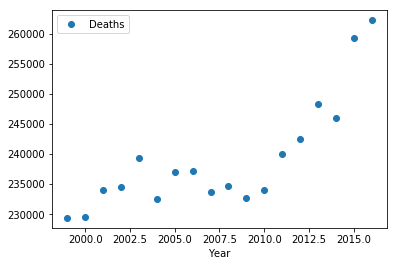

In [68]:
#Example plotting the general death rate in California from 1999 to 2016
state_all_years('California').plot(x='Year', y='Deaths', style='o')

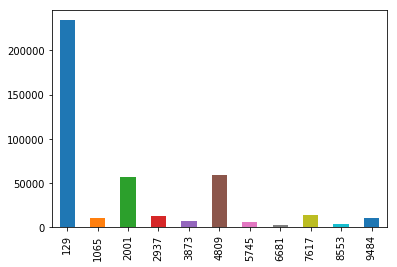

In [69]:
#In this graph, we can see the prevalences of each cause of death in the California 2010 data 
cali_2010["Deaths"].plot('bar')

<BarContainer object of 11 artists>

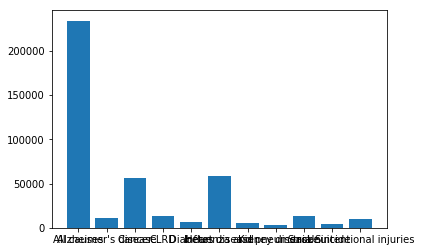

In [70]:
#Here is another visualization that gives the relative number of deaths from each cause in California 2016
plt.bar(x='Cause', height='Deaths', width=0.8, bottom=None, align='center', data=cali_2010)

# The End! 

Congratulations! We just went through a huge data set and dipped our toes into Pandas 

For the future, keep in mind that Pandas and Python each hold endless possibilities, so the more you can get creative with your data, the more you can do!